### 2. Backward Elimination
- Step 1: select a significance level to stay in the model (e.g. SL = 0.05, "p-value")
- Step 2: Fit the full model with all possible predictor (independent features)
- Step 3: Consider the predictor (independent feature) with the highest P-value. If P>SL, go to STEP 4, otherwise go to FIN
- Step 4: Remove the predictor (independent feature)
- Step 5: Fit model without this variable
- Step 6: Back to Step 3
- FIN: Your Model Is Ready
Source: https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

In [2]:
data_set = pd.read_csv("50_Startups.csv")
data_set.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#Extracting Independent and dependent Variable  
X= data_set.iloc[:, :-1].values  
y= data_set.iloc[:, 4].values

In [4]:
#Catgorical data, criating dummy variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [5]:
#Avoiding the dummy variable trap:  
X = X[:, 1:]

The Dummy Variable Trap occurs when two or more dummy variables created by one-hot encoding are highly correlated (multi-collinear). This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models.

(São linearmente dependentes, algebra linear)

Source: https://www.learndatasci.com/glossary/dummy-variable-trap/

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)  

In [7]:
#Fitting the MLR model to the training set:  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
#Predicting the Test set result;  
y_pred= regressor.predict(X_test)

In [9]:
#Checking the score  
print('Train Score: ', regressor.score(X_train, y_train))  
print('Test Score: ', regressor.score(X_test, y_test))  

Train Score:  0.9501847627493607
Test Score:  0.9347068473282446


#### Preparation of Backward Elimination

In [10]:
import statsmodels.api as smf

Adding a column in matrix of features:

As we can check in our MLR equation (a), there is one constant term b0, but this term is not present in our matrix of features, so we need to add it manually. We will add a column having values x0 = 1 associated with the constant term b0.
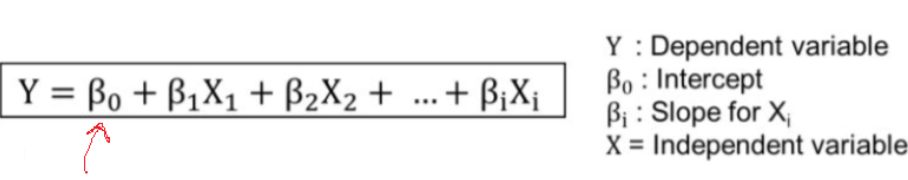

In [11]:
print("Matrix before...")
print(X)

Matrix before...
[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 134615.46 147198.87 127716.82]
 [1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 120542.52 148718.95 311613.29]
 [0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 101913.08 110594.11 229160.95]
 [0.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 93863.75 127320.38 249839.44]
 [0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 86419.7 153514.11 0.0]
 [0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 73994.56 122782.75 303319.26]
 [1.0 0.0 67532.53 105751.03 304768.73]
 [0.0 1.0 77044.01 99281.

In [12]:
print("Matrix after...")
X = np.append(arr = np.ones((50,1)).astype(int), values=X, axis=1)
print(X)

Matrix after...
[[1 0.0 1.0 165349.2 136897.8 471784.1]
 [1 0.0 0.0 162597.7 151377.59 443898.53]
 [1 1.0 0.0 153441.51 101145.55 407934.54]
 [1 0.0 1.0 144372.41 118671.85 383199.62]
 [1 1.0 0.0 142107.34 91391.77 366168.42]
 [1 0.0 1.0 131876.9 99814.71 362861.36]
 [1 0.0 0.0 134615.46 147198.87 127716.82]
 [1 1.0 0.0 130298.13 145530.06 323876.68]
 [1 0.0 1.0 120542.52 148718.95 311613.29]
 [1 0.0 0.0 123334.88 108679.17 304981.62]
 [1 1.0 0.0 101913.08 110594.11 229160.95]
 [1 0.0 0.0 100671.96 91790.61 249744.55]
 [1 1.0 0.0 93863.75 127320.38 249839.44]
 [1 0.0 0.0 91992.39 135495.07 252664.93]
 [1 1.0 0.0 119943.24 156547.42 256512.92]
 [1 0.0 1.0 114523.61 122616.84 261776.23]
 [1 0.0 0.0 78013.11 121597.55 264346.06]
 [1 0.0 1.0 94657.16 145077.58 282574.31]
 [1 1.0 0.0 91749.16 114175.79 294919.57]
 [1 0.0 1.0 86419.7 153514.11 0.0]
 [1 0.0 0.0 76253.86 113867.3 298664.47]
 [1 0.0 1.0 78389.47 153773.43 299737.29]
 [1 1.0 0.0 73994.56 122782.75 303319.26]
 [1 1.0 0.0 67532.53

In [13]:
# variable that contains a set of independent features that are significantly affecting the dependent variable
x_opt = None

In [14]:
x_opt=X[:, [0,1,2,3,4,5]]

x_opt=x_opt.astype(int)

regressor_OLS=smf.OLS(endog = y, exog=x_opt).fit()  
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.34e-27
Time:                        09:32:41   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.855      7.281      0.000    3.63e+04     6.4e+04
x1           198.7542   3371.026      0.059      0.953   -6595.103    6992.611
x2           -42.0063   3256.058     -0.013      0.990   -6604.161    6520.148
x3             0.8060      0.046     17.368      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.783   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.267
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the above image, we can clearly see the p-values of all the variables. Here x1, x2 are dummy variables, x3 is R&D spend, x4 is Administration spend, and x5 is Marketing spend.

From the table, we will choose the highest p-value, which is for x1=0.953 Now, we have the highest p-value which is greater than the SL value, so will remove the x1 variable (dummy variable) from the table and will refit the model. Below is the code for it:

In [15]:
x_opt=X[:, [0,2,3,4,5]]

x_opt=x_opt.astype(int)

regressor_OLS=smf.OLS(endog = y, exog=x_opt).fit()  
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           8.50e-29
Time:                        09:32:41   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.018e+04   6747.657      7.437      0.000    3.66e+04    6.38e+04
x1          -136.6070   2801.735     -0.049      0.961   -5779.592    5506.378
x2             0.8059      0.046     17.571      0.000       0.714       0.898
x3            -0.0269      0.052     -0.521      0.605      -0.131       0.077
x4             0.0271      0.017      1.625      0.111      -0.007       0.061
==============================================================================
Omnibus:                       14.892   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.666
Skew:                          -0.949   Prob(JB):                     1.97e-05
Kurtosis:                       5.608   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the above image, we can clearly see the p-values of all the variables. Here x1, x2 are dummy variables, x3 is R&D spend, x4 is Administration spend, and x5 is Marketing spend.

From the table, we will choose the highest p-value, which is for x1=0.953 Now, we have the highest p-value which is greater than the SL value, so will remove the x1 variable (dummy variable) from the table and will refit the model. Below is the code for it:

In [16]:
x_opt=X[:, [0,2,3,4,5]]

x_opt=x_opt.astype(int)

regressor_OLS=smf.OLS(endog = y, exog=x_opt).fit()  
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           8.50e-29
Time:                        09:32:41   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.018e+04   6747.657      7.437      0.000    3.66e+04    6.38e+04
x1          -136.6070   2801.735     -0.049      0.961   -5779.592    5506.378
x2             0.8059      0.046     17.571      0.000       0.714       0.898
x3            -0.0269      0.052     -0.521      0.605      -0.131       0.077
x4             0.0271      0.017      1.625      0.111      -0.007       0.061
==============================================================================
Omnibus:                       14.892   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.666
Skew:                          -0.949   Prob(JB):                     1.97e-05
Kurtosis:                       5.608   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see in the output image, now five variables remain. In these variables, the highest p-value is 0.961. So we will remove it in the next iteration.

Now the next highest value is 0.961 for x1 variable, which is another dummy variable. So we will remove it and refit the model. Below is the code for it:

In [17]:
x_opt=X[:, [0,3,4,5]]

x_opt=x_opt.astype(int)

regressor_OLS=smf.OLS(endog = y, exog=x_opt).fit()  
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           4.53e-30
Time:                        09:32:41   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.384      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.839   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.443
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.587   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the above output image, we can see the dummy variable(x2) has been removed. And the next highest value is .602, which is still greater than .5, so we need to remove it.

Now we will remove the Admin spend which is having .602 p-value and again refit the model.

In [18]:
x_opt=X[:, [0,3,5]]

x_opt=x_opt.astype(int)

regressor_OLS=smf.OLS(endog = y, exog=x_opt).fit()  
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           2.16e-31
Time:                        09:32:41   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.941     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.265      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.162
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see in the above output image, the variable (Admin spend) has been removed. But still, there is one variable left, which is marketing spend as it has a high p-value (0.60). So we need to remove it.

Finally, we will remove one more variable, which has .60 p-value for marketing spend, which is more than a significant level.
Below is the code for it:

In [19]:
x_opt=X[:, [0,3]]

x_opt=x_opt.astype(int)

regressor_OLS=smf.OLS(endog = y, exog=x_opt).fit()  
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           3.50e-32
Time:                        09:32:41   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.900     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.538
Skew:                          -0.911   Prob(JB):                     9.43e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see in the above output image, only two variables are left. So only the R&D independent variable is a significant variable for the prediction. So we can now predict efficiently using this variable.

In [20]:
data_set = pd.read_csv("50_Startups.csv")
data_set.head()
#Extracting Independent and dependent Variable  
X= data_set.iloc[:, 0:1].values  
y= data_set.iloc[:, 4].values

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(X_train, y_train)

#Predicting the Test set result;  
y_pred= regressor.predict(X_test)

#Checking the score  
print('Train Score: ', regressor.score(X_train, y_train))  
print('Test Score: ', regressor.score(X_test, y_test))

Train Score:  0.9449589778363044
Test Score:  0.9464587607787219


As we can see, the training score is 94% accurate, and the test score is also 94% accurate. The difference between both scores is .00149. This score is very much close to the previous score, i.e., 0.0154, where we have included all the variables.

We got this result by using one independent variable (R&D spend) only instead of four variables. Hence, now, our model is simple and accurate.

### Implementing Backward elimination using built-in functions in Python:

In [46]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

data_set = pd.read_csv("50_Startups.csv")
data_set.head()
#Extracting Independent and dependent Variable  
X= data_set.iloc[:, 0:4].values  
y= data_set.iloc[:, 4].values

#Catgorical data, criating dummy variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X=np.array(ct.fit_transform(X))

# Avoiding the dummy variable trap:  
X = X[:, 1:]

X = np.append(arr = np.ones((50,1)).astype(int), values=X, axis=1)

sbs = SFS(LinearRegression(),
         k_features=1,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X, y)
sbs.k_feature_names_

('3',)

In [52]:
X[:,3] # R&D independent variable

array([165349.2, 162597.7, 153441.51, 144372.41, 142107.34, 131876.9,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
       93863.75, 91992.39, 119943.24, 114523.61, 78013.11, 94657.16,
       91749.16, 86419.7, 76253.86, 78389.47, 73994.56, 67532.53,
       77044.01, 64664.71, 75328.87, 72107.6, 66051.52, 65605.48,
       61994.48, 61136.38, 63408.86, 55493.95, 46426.07, 46014.02,
       28663.76, 44069.95, 20229.59, 38558.51, 28754.33, 27892.92,
       23640.93, 15505.73, 22177.74, 1000.23, 1315.46, 0.0, 542.05, 0.0],
      dtype=object)

But we can analysis a number of feature would be good

In [55]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

data_set = pd.read_csv("50_Startups.csv")
data_set.head()
#Extracting Independent and dependent Variable  
X= data_set.iloc[:, 0:4].values  
y= data_set.iloc[:, 4].values

#Catgorical data, criating dummy variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X=np.array(ct.fit_transform(X))

# Avoiding the dummy variable trap:  
X = X[:, 1:]

X = np.append(arr = np.ones((50,1)).astype(int), values=X, axis=1)

sbs = SFS(LinearRegression(),
         k_features=(1,6), # mim and max values
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=(1, 6))

C:\Users\lucas_alves\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\lucas_alves\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


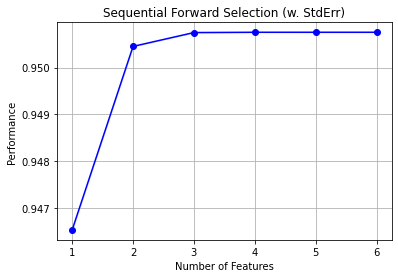

In [57]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()